### STA 208: Homework 1 (Do not distribute)

## Due 4/13/20 midnight 

__Instructions:__ To make grading easier for the TAs please submit it on canvas in a zip file with either the scanned solutions clearly written or in the jupyter notebook below.  The zip file should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand and scanned.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (20 pts)

Consider the binary classification setting where the training data is $x_i \in \mathbb R^p, y_i \in \{0,1\}, i=1,\ldots,n$ and recall the empirical risk (as a function of the predictor $g : \mathbb R^p \to \{0,1\}$),
$$
R_n(g) = \frac 1n \sum_{i=1}^n \ell(y_i, g(x_i)),
$$
and the true risk is 
$$
R(g) = \mathbb E \ell(Y,g(X))
$$
where $X,Y$ are drawn from their joint distribution $f_{X,Y}(x,y)$.

1. Suppose that the loss function is the Hamming loss, $\ell(y,\hat y) = 1\{ y \ne \hat y\}$.  What is the predictor that minimizes the True risk?  (Hint: derive an expression for this based on the joint distribution - you can use expressions involving conditional probabilities.)  This predictor is called the Bayes rule.
2. Suppose that we know that the Bayes rule can be written in the form, 
$$
h_j(x) = 1\{ x_j > 0 \}, 
$$
for some $j = 1,\ldots,p$, but we don't know which one.  Now using the empirical risk, what is a reasonable classification algorithm (Hint: you can think of finding a good classifier as a problem of finding $j$).  Describe the fit and predict methods. 
3. (Challenging) Suppose that I told you that for any fixed $j$ the following probability bound holds (from Hoeffding's inequality)
$$
\mathbb P \left\{ |R_n(h_j) - R(h_j)| > t \right\} \le 2 \exp \left( - 2 n t^2 \right).
$$
If $p=10$, how many samples would I need to get a classifier $\hat g$, from the previous question (part 2), such that 
$$
\mathbb P \left\{ R(\hat g) < R(h) + 0.1 \right\} \ge 0.95.
$$
where $h$ is the Bayes rule, namely, the $h_j$ that minimizes $R$.
(Hint: use the union bound to show that $R_n(\hat g) \approx R(\hat g)$ and use the fact that $R_n(\hat g) \le R_n(h_j)$ for any $j$ because it is in the minimizer.)

1.
The true risk is 
$$R(g)=El(Y,g(X))$$
We know that the Hamming loss:
$$l(Y,g(X))=1\{Y\neq g(X)\}$$
so the true risk is:
$$R(g)=P(Y\neq g(X)) = 1-P(Y=g(X))$$
so we want to find the predictor $g(X)$ to maximum $P(Y=g(X))$
So, we want to find the predictor
$$g = \text{arg}maxP(Y=g(X))$$
According to the conditional distribution (f(X,Y) is discrete distribution)
$$g = \text{arg}max P(Y=g(X)) = \text{arg}max \sum_{X}P(Y=g(X)|X)P(X)$$
The last expression turns to be:
$$g = \text{arg}max \sum_{X}\sum_Y f_{X,Y}(g^{-1}(Y),Y)f_{X,Y}(X,Y)$$

$\textbf{Fit method}$

For each j = 1,..,p, compute 
$$R_n(j) = \frac 1n \sum_{i=1}^n 1\{y_i,\neq h_j(x_i)\}$$
Compare the value of $R_n(j),j = 1,..,p$, and choose the $j_0$ which help the function reach the smallest value.



$\textbf{predict method}$

Given any input $x$, compute $h_j(x)$. If $x_j$>0, then $g(x)=1$; otherwise, $g(x)=0$

3.  

Notice that the union bound
$$P(\bigcup_i A_i) \leq \sum_i P(A_i)$$
so, $(R_n(\hat g) \le R_n(h_j))$
\begin{equation}
\mathbb P \left\{ R(\hat g) < R(h) + t \right\}  = \mathbb P(R(\hat g)-R_n(\hat g)+R_n(\hat g)-R(h)<t) \\
                                 =\mathbb P([R(\hat g)-R_n(\hat g)]+[R_n(\hat g)-R(h)]<t) \\
                                 \geq \mathbb P([R(\hat g)-R_n(\hat g)]+[R_n(h)-R(h)]<t)
\end{equation}
Because
$$
\mathbb P \left\{ |R_n(h_j) - R(h_j)| > t \right\} \le 2 \exp \left( - 2 n t^2 \right).
$$
we get
$$
\mathbb P \left\{ |R_n(h) - R(h)| > t \right\} = \mathbb P \left\{ \bigcup_{j=1}^{10} |R_n(h_j) - R(h_j)| > t \right\}
\leq \sum_{j=1}^{10}P \left\{ |R_n(h) - R(h)| > t \right\} \leq 20\exp \left( - 2 n t^2 \right)
$$
And
$$
\mathbb P \left\{ R(\hat g) < R(h) + t \right\} \geq 1- \mathbb P([R(\hat g)-R_n(\hat g)]+[R_n(h)-R(h)]\geq t) \geq 0.95
$$
$$\mathbb P([R(\hat g)-R_n(\hat g)]+[R_n(h)-R(h)]\geq t) \leq 0.05$$
we know $R_n(\hat g) \le R_n(h_j)$
$$\mathbb P(|R_n(h)-R(h)|\geq t/2) \leq 0.05$$
Finally,solve the inequality
$$20\exp \left( - 2 n t^2 \right)\leq 0.05$$
we get that $n>1198$, we need 1199 samples.

__Exercise 2__ (20 pts)

Consider the regression setting in which $x_i \in \mathbb R^p$ and $y_i \in \mathbb R$, for $i=1,\ldots,n$ and $p < n$.

1. For a given regressor, let $\hat y_i$ be prediction given $x_i$, and $\hat y$ be the vector form.  Show that both linear regression and k-nearest neighbors can be written in the form
$$
\hat y = H y,
$$
where $H$ is dependent on $X$ (the matrix of where each row is $x_i$), assuming that $p < n$ and $X$ is full rank.  Give an expression for $H$ or an algorithm for computing $H$.  Assume that the KNN algorithm will use the same point as its own nearest neighbor (this is consistent with what you get if you use the same dataset in fit and predict in sklearn.)  You can just write it in words or pseudocode. 
2. Give a simple modification to your algorithm to compute the KNN's $H$ matrix so that a sample does not use its own point.  Derive an expression for the leave-one-out cross validated squared error based on this $H$. You can just write it in words or pseudocode. 
3. For linear regression (with $p < n$ and $X$ is full rank), let $X = U D V^\top$ be the singular value decomposition where $U$ is $n \times p$, and $V, D$ is $p \times p$ ($D$ is diagonal). Derive an expression for the OLS coefficients $\beta = A b$ such that $A$ is $p \times p$ and depends on $V$ and $D$, and $b$ is a $p$ vector and does not depend on $D$.  Describe a fit method that precomputes these quantities separately, and describe a predict method.


4. Consider a regressor that performs OLS using the SVD above, but every instance of D will only use the largest $r$ values, and only the first $r$ columns of $U,V$ would be used.  Let $U_r, V_r$ be the $n \times r$ and $p \times r$ eigenvector matrices.  Call the new $r \times r$ matrix $D_r$ ($r < p$) which just has the top $r$ singular values.  Then the new coefficient vector is the OLS computed as if the design matrix is modified by $X \gets U_r D_r V_r^\top$.  Given that you have computed $b$ already, how could you make a method `change_rank` that recomputes $A$ with $D_r$ instead of $D$?  What is its computational complexity (it should not depend on n)?

1.

For the linear regression, we know that the ecpression is 
$$Y = X\beta+\epsilon$$
Least square criterion is
$$Q(\beta) = (Y-X\beta)^T(Y-X\beta)$$
differentiate it with respect to $\beta$
$$-2X^TY+2X^TX\beta=0$$
so $\beta = (X^TX)^{-1}X^TY$. $$\hat{y} = X\beta = X(X^TX)^{-1}X^Ty = HY$$
here $H = X(X^TX)^{-1}X^T$.

For k-nearest neighbor, the output is the average of the values of k nearest neighbors
$$\hat{y_i} = \frac 1k \sum_{j=1}^k y_{i,j}$$
notice that we can construct a $n*n$ matrix, whose entries are 0 and 1. For each row, there are k 1s' and n-k 0s'. The index of 1 represents the index of the k nearest neighbors. Denote the matrix by H. The matrix form is
$$\hat{y} = Hy$$
Bacause the distance function is $d(X_i,X_j)$,so the matrix H is dependent on X.

2.

In the k-nearest neighbor regression, for each point, the nearest neighbour is itself. The modified $H$ that a sample does not use its own point is 
$$\hat{y_i} = \frac 1k (\sum_{j=1}^{k+1} y_{i,j}-y_i) = H_0y_i$$
So the matrix $H_0$ changes a little. The index of 1 represents the index of the k+1 nearest neighbors except itself. The leave-one-out cross validated squared error is
$$\sum_{i=1}^n (y_i - H_0y_i)^2$$

3.

We know that $\beta = (X^TX)^{-1}X^TY$. Here the singular value decomposition gives $X=UDV^T$, so we know that 
$$\beta = (VD^TU^TUDV^T)^{-1}VD^TU^TY = (VD^2V^T)^{-1}VD^TU^TY =(V^T)^{-1}D^{-1}U^TY = VD^{-1}U^TY$$
V and D are $p*p$ and U is $n*p$. So $VD^{-1}$ is $p*p$ and $U^TY$ is $n*1$, which means that 
$$\beta = (VD^{-1})(U^TY) = Ab$$

4.

We know that $\beta = (X^TX)^{-1}X^TY$ and $X \gets U_r D_r V_r^T$, so
$$\beta_r = (V_r D_r^T U_r^T U_r D_r V_r^T)^{-1}V_r D_r^T U_r^TY = (V_r D_r^T D_r V_r^T)^{-1} V_r D_r^T  U_r^TY$$
Let $V_r D_r^T = B_r$, then $\beta_r = (B_rB_r^T)^{-1}B_rU_r^TY$. Let $A_r=(B_rB_r^T)^{-1}B_r$ and $b_r=U_r^TY$.
$D$ is a diag matrix, $D=diag(D_r,D_{p-r})$ and $V$ is a $p*p$ matrix and $V_r$ is $p*r$ matrix. $B_r$ is a $p*r$ matrix and it is the submatrix of $VD^T$. So we only need to compute the $VD^T$ at the beginning .

However, if we consider the formula above, we may get $A_r = V_rD_r^{-1}$ and according to my code, it has a better performance. 

The computational complexity of inverse $(B_rB_r^T)^{-1}$ is $O(p^3)$.

The computational complexity of inverse $V_rD_r^{-1}$ is $O(p*r)$.

__Exercise 3__ (30 pts)

We call the method that zeros out all but $r$ largest singular values in OLS, singular value regression.  Implement the singular value regressor as a sklearn style class below.  Test it by simulating the training and test data from the `gen_LR_data` function below and calculate the average square error on the test set.  Do this for each choice of `r` in the fit function (from 1 to $p$).

In [6]:
import numpy as np
from scipy.linalg import svd

In [383]:
class SingularValueRegressor:
    """
    : A regression object that uses the SVD to fit and predict
    : Init: specify rank r
    : .fit: solve the SVD of X and precompute beta
    : .predict: Return y hat for X_test
    """
    
    def __init__(self,r):
        """
        : Store the rank
        """
        self.r = r

        
    def fit(self,X,y):
        """
        : Computes and stores the SVD (use scipy.linalg.svd)
        : Computes beta for rank r singular value regression
        """
        self.y = y
        X0 = np.c_[np.ones((X.shape[0],1)), X]
        self.U, self.D, self.VT = np.linalg.svd(X0, full_matrices=False)
        Dr = np.diag(list(self.D[:self.r]))
        Vr = self.VT[:self.r,:] 
        #B = Vr.T @ Dr                  
        #Ar = np.linalg.inv(B @ B.T) @ B
        Ar2 = Vr.T @ np.linalg.inv(Dr)
        Ur = self.U[:,:self.r]     
        br = Ur.T @ self.y
        #self.beta = Ar @ br     
        self.beta2 = Ar2 @ br 
        
    def predict(self,X_test):
        """
        : Outputs the predicted y given the predictors X_test
        """
        X_test0 = np.c_[np.ones((X_test.shape[0],1)),X_test]
        return X_test0 @ self.beta2
        
    def change_rank(self,r):
        """
        : Assumes that the SVD has been computed and uses it to change the rank; after
        : running the new regressor object should be as if we fit with the new rank r
        """
        Dr = np.diag(list(self.D[:r]))
        Vr = self.VT[:r,:] 
        #B = Vr.T @ Dr 
        #Ar = np.linalg.inv(B @ B.T) @ B
        Ar2 = Vr.T @ np.linalg.inv(Dr)
        Ur = self.U[:,:r]     
        br = Ur.T @ self.y
        #self.beta = Ar @ br     
        self.beta2 = Ar2 @ br   

In [376]:
def gen_LR_data(r = 10, p = 20, n = 100):
    """
    : generate data from an approx low rank regression model
    """
    alpha = np.random.chisquare(1,size = (p,r)) #X coefficients
    Z = np.random.normal(size=(n,r)) #X covariates
    beta = np.random.normal(size = r) #reg covs
    mu = Z @ beta #hidden mean
    Xmean = Z @ alpha.T #random transformation of Z
    X = Xmean + np.random.normal(0,.5,size=(n,p)) #add noise - not exactly low rank
    X_test = Xmean + np.random.normal(0,.5,size=(n,p))
    y = mu + np.random.normal(0,1,size=(n))
    y_test = mu + np.random.normal(0,1,size=(n))
    return (X,y,X_test,y_test)

Text(0, 0.5, 'the average square error')

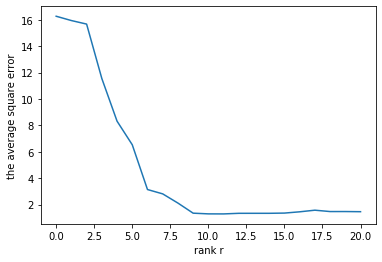

In [377]:
X,y,X_test,y_test = gen_LR_data()
SVR = SingularValueRegressor(1) #initialize
SVR.fit(X,y)

ASE_list = []
for r in range(21):
    SVR.change_rank(r+1)
    ASE = np.square(SVR.predict(X_test)- y_test).mean()
    ASE_list.append(ASE)

import matplotlib.pyplot as plt
plt.plot(list(range(21)),ASE_list)
plt.xlabel('rank r')
plt.ylabel('the average square error')

# My Question
In the part 2.4, I get
$$\beta_r =  (V_r D_r^T D_r V_r^T)^{-1} V_r D_r^T  U_r^TY$$
Because $V_r$ is not Square matrix, so we cannot simplify the formula. Then why the performance is so poor when I use this equation to compute $A_r$ ? I think $A_r = V_rD^{-1}$ is incorrect because I cannot gei it.

__Exercise 4__ (30 pts)

The dataset in the hw1 directory has a Y variable, 7 predictor variables (X1 - X7).  Using sklearn and the class that you constructed above, compare ridge regression, OLS, kNN, and SingularValueRegressor.  Compare and tune the methods using appropriate testing procedures.  Comment on the tuning of each parameter in ridge, kNN, and SingularValueRegressor in markdown.  Be sure to standardize the X variables first and decide how to deal with NAs.  

In [247]:
import pandas as pd
from sklearn import linear_model

In [418]:
data_mat = pd.read_csv('hw1_data.csv')
data_mat.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


Some notes for the NAs, you need to replace the NAs somehow to use these methods.  The SimpleImputer will replace the NAs with the mean,median, etc.  You can fit this on the training data and use this to transform for the test set.  We can see that any imputer that is fit only on the training set also can give you that the test error is an unbiased risk estimator.  Let $\hat I$ be the imputer transform and $\hat f$ be any trained predictor.

$$\hat I: R^p \to R^{p}$$
$$\hat f: R^{p} \to R$$

For example,
$(\hat I(x))_j = $ $x_j$ if non-missing and $\hat \mu_j$ if missing 
or you could add a missingness indicator,
$$\hat I_2: R^p \to R^{2p}$$

$(\hat I_2(x))_j = $ $x_j$ if non-missing and $\hat \mu_j$ if missing for $j =1,\ldots,p$

$(\hat I_2(x))_{p+j} = $ $0$ if non-missing and $1$ if missing for $j =1,\ldots,p$

The trained predictor could be linear,
ex. $\hat f(\hat I(x)) = \hat I(x)^\top \hat \beta$

Then we can combine these steps into one predictor,
$\hat g(x) = \hat f (\hat I (x))$.

The test error is still an unbiased risk estimator,
$$\frac{1}{n_t} \sum_{i=n_0+1}^{n_0+n_t} (y_i - \hat g(x_i))^2.$$

In [419]:
from sklearn import preprocessing

In [420]:
y = data_mat['Y']
X_0 = data_mat.drop('Y', axis = 1)

In [421]:
X_0.describe() 

,X1,X2,X3,X4,X5,X6,X7
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Obviously, X3 has several missing value. We replace the NAs with the mean here.

In [422]:
print(X_0.isnull().sum())

X1    0
X2    0
X3    6
X4    0
X5    0
X6    0
X7    0
dtype: int64


In [423]:
X_0['X3'].fillna(104.5, inplace=True)
print(X_0.isnull().sum())

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
dtype: int64


In [424]:
# Get column names first
names = X_0.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled = scaler.fit_transform(X_0)
X = pd.DataFrame(scaled, columns=names)

In [449]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=208)

Text(0, 0.5, 'MSE')

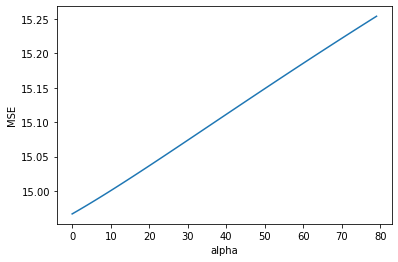

In [450]:
from sklearn.linear_model import Ridge
# ridge regression
MSE_list=[]
n=80
for i in range(n):
    RR = Ridge(alpha=i/10)
    RR.fit(X_train, y_train)
    MSE = np.square(RR.predict(X_test) - y_test).mean()
    MSE_list.append(MSE)
plt.plot(list(range(n)),MSE_list)
plt.xlabel('alpha')
plt.ylabel('MSE')

In [451]:
RR = Ridge(alpha=0/10)
RR.fit(X_train, y_train)
MSE = np.square(RR.predict(X_test) - y_test).mean()
print('The MSE of RR is '+str(MSE))

The MSE of RR is 14.966726565996398


Text(0, 0.5, 'MSE')

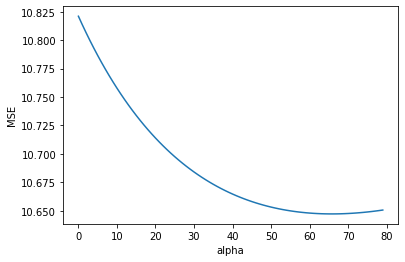

In [452]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20676)
MSE_list=[]
n=80
for i in range(n):
    RR = Ridge(alpha=i/10)
    RR.fit(X_train, y_train)
    MSE = np.square(RR.predict(X_test) - y_test).mean()
    MSE_list.append(MSE)
plt.plot(list(range(n)),MSE_list)
plt.xlabel('alpha')
plt.ylabel('MSE')

In [453]:
RR = Ridge(alpha=6.5)
RR.fit(X_train, y_train)
MSE = np.square(RR.predict(X_test) - y_test).mean()
print('The MSE of RR is '+str(MSE))

The MSE of RR is 10.647206525446192


In this model, It is hard to say when the model has the best performance. But the MSE of the model is less than 11, which represents a good performance.

In [454]:
from sklearn.linear_model import LinearRegression
#OLS

OLS = LinearRegression()
OLS.fit(X_train, y_train)
MSE = np.square(OLS.predict(X_test) - y_test).mean()
print('The MSE of OLS is '+str(MSE))

The MSE of OLS is 10.82102080667232


Text(0, 0.5, 'MSE')

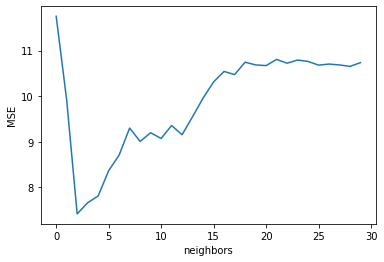

In [455]:
from sklearn.neighbors import KNeighborsRegressor

MSE_list=[]
for i in range(30):
    KNN = KNeighborsRegressor(n_neighbors=i+1)
    KNN.fit(X_train, y_train)
    MSE = np.square(KNN.predict(X_test) - y_test).mean()
    MSE_list.append(MSE)
plt.plot(list(range(30)),MSE_list)
plt.xlabel('neighbors')
plt.ylabel('MSE')

In [456]:
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train, y_train)
MSE = np.square(KNN.predict(X_test) - y_test).mean()
print('The MSE of KNN is '+str(MSE))

The MSE of KNN is 7.415055555555557


In this case, when k=3, the model reaches the best performance.

Text(0, 0.5, 'the average square error')

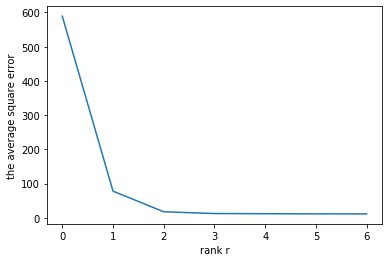

In [457]:
#SingularValueRegressor.
ASE_list=[]
SVR = SingularValueRegressor(2) #initialize
SVR.fit(X_train, y_train)

for r in range(7):
    SVR.change_rank(r+1)
    ASE = np.square(SVR.predict(X_test)- y_test).mean()
    ASE_list.append(ASE)

import matplotlib.pyplot as plt
plt.plot(list(range(7)),ASE_list)
plt.xlabel('rank r')
plt.ylabel('the average square error')

In [458]:
SVR.change_rank(7)
ASE = np.square(SVR.predict(X_test)- y_test).mean()
print('The MSE of SVR is '+str(ASE))

The MSE of SVR is 11.065623947887762


In this case, when $p=r$, the model reaches the best performance.

# Conclusion
In summary, here the linear model gives the best performance.